Figure 3: Shock predicting cell co-firing stifled by ANI administration

In [1]:
import scipy.stats as s
import numpy as np
import matplotlib.pyplot as plt
from os import path
import seaborn as sns
import pandas as pd
import scipy.io as sio

# Import project specific modules and enable automatic reloading
import sys
from pathlib import Path
import os
eraser_path = Path(os.getcwd()).parent
reinstatement_path = eraser_path.parent / 'FearReinstatement'
sys.path.append(str(eraser_path))
sys.path.append(str(reinstatement_path))
%load_ext autoreload
%autoreload 2

import eraser_reference as err
import er_plot_functions as er
from plotting import Fig, pretty_plot, FigMirror
import placefield_stability as pfs
import Placefields as pf
import discrimination as discr
import ca_traces as trc
import freezing_analysis as fa
from plotting import Fig, pretty_plot, FigMirror
from helpers import contiguous_regions

Set up Figure 3 and S6 (example freeze-tuned rasters) and maybe S7 (ensemble analysis)

Plot #1: Example motion trace with cell activity overlaid.  Ideally this would show two neurons that aren't tuned together before shock and then activate together after shock.

Plot #2: Example freeze-tuned cell rasters from each group?

[8.5 6.5]
[8.5 6.5]


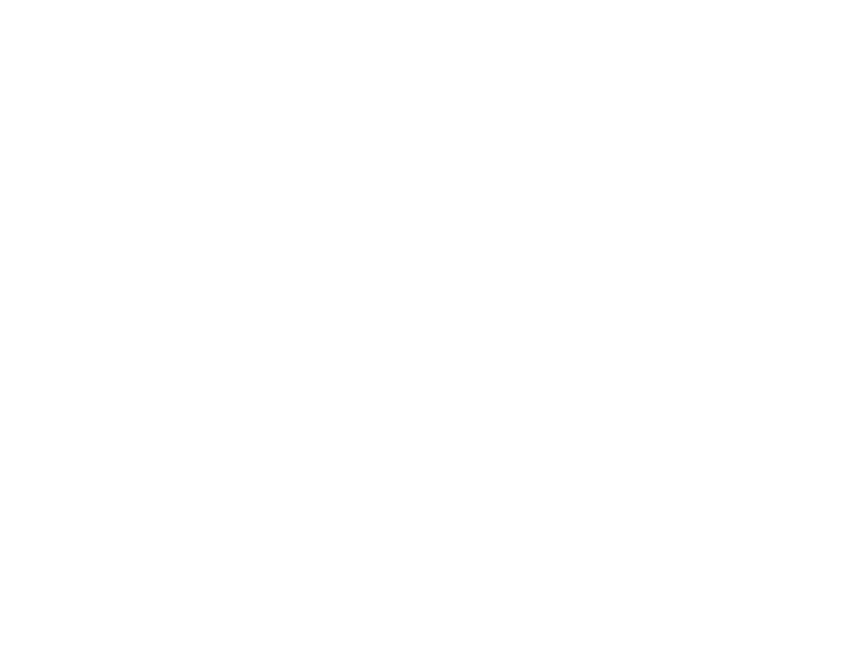

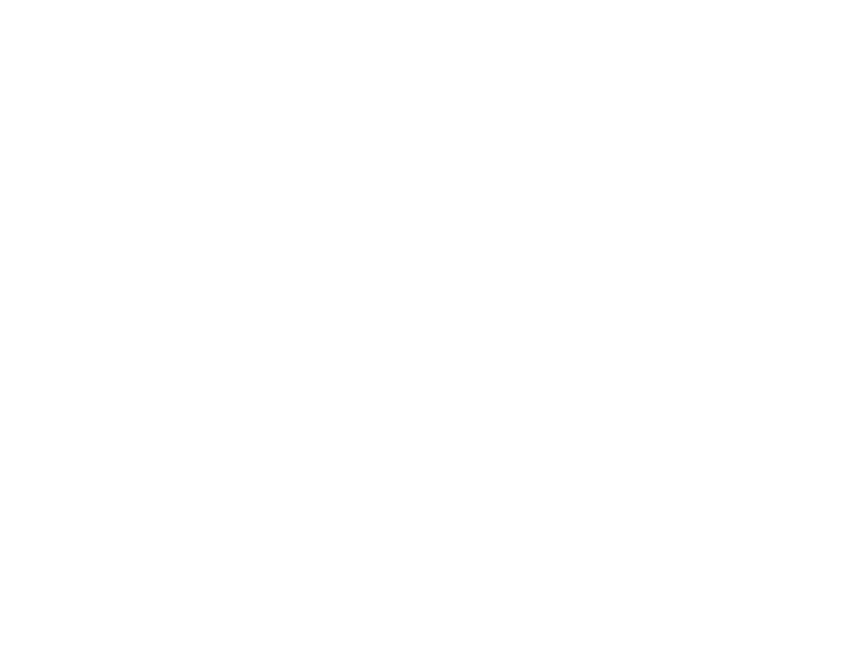

In [17]:
%matplotlib ipympl
Fig3 = Fig(num=3, grid=(4, 4), size=(8.5, 6.5), fontsize=6)  # size=(7.2, 5.3) if not scaling properly
print(Fig3.fig.get_size_inches())
Fig3stats = Fig(num="Figure 3 stats", grid=(4, 4), size=(8.5, 6.5), fontsize=6) 
print(Fig3stats.fig.get_size_inches())
Fig3comb = FigMirror(Fig3, Fig3stats)

First, plot example freezing cells from Marble07: 53, 67, 90, and 334

In [3]:
mmd = fa.MotionTuningMultiDay('Marble07', arena = 'Shock', days= [-1, 4, 1, 2])

In [4]:
mmd.motion_tuning['Shock'][1].freezing_times.shape

(50, 2)

<AxesSubplot:>

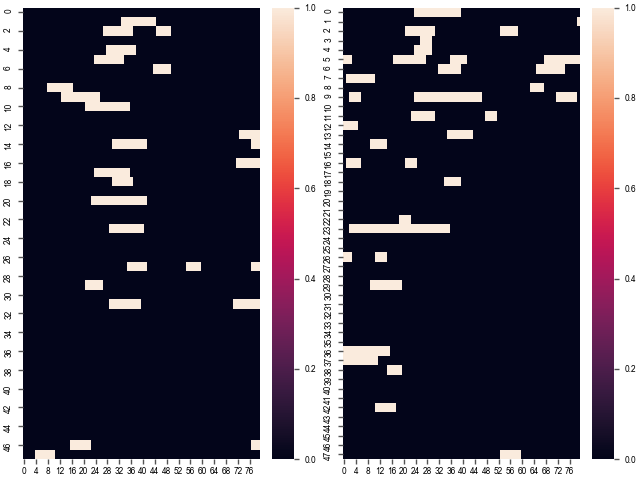

In [5]:
_, ax = plt.subplots(1, 2)
sns.heatmap(mmd.motion_tuning['Shock'][1].pe_rasters['freeze_onset'][334], ax=ax[0])
sns.heatmap(mmd.motion_tuning['Shock'][1].pe_rasters['freeze_onset'][53], ax=ax[1])

In [6]:
# fig, ax = plt.subplots()
# fig.set_size_inches([7.1 , 1.76])
ax_ex_cell_cofire = Fig3.subplot2grid(Fig3.gs[0, 0:3], grid=(1, 2), return_axes=True)
neurons_plot = [53, 334]
im_data = sio.loadmat(mmd.motion_tuning['Shock'][1].dir_use / 'FinalOutput.mat')
rawtraces = im_data['NeuronTraces']['RawTrace'].squeeze().item()
rawtraces = rawtraces[:, :mmd.motion_tuning['Shock'][1].PSAbool.shape[1]]  # Align rawtraces with PSAbool
rawz = (rawtraces - rawtraces.mean(axis=1)[:, None])/rawtraces.std(axis=1)[:, None]
psabool = mmd.motion_tuning['Shock'][1].PSAbool
t = np.arange(0, mmd.motion_tuning['Shock'][1].PSAbool.shape[1])/mmd.motion_tuning['Shock'][1].sr_image
for ax, xlim in zip(ax_ex_cell_cofire, ([265, 290], [340, 380])):
    for psa, trace in zip(psabool[[neurons_plot]].astype(bool), rawz[[neurons_plot]]):
        ax.plot(t, trace)
        for event_idx in contiguous_regions(psa):
            ax.plot(t[event_idx[0]:event_idx[1]], trace[event_idx[0]:event_idx[1]], 'r')

    for ftimes in mmd.motion_tuning['Shock'][1].freezing_times:
        ax.axvspan(ftimes[0], ftimes[1], color=[0, 1, 0, 0.3])

    ax.set_xlim(xlim)

/var/folders/7g/v7xwy2z52hxcjg7pfsxbb8zc0000gn/T/ipykernel_10450/4045577380.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  for psa, trace in zip(psabool[[neurons_plot]].astype(bool), rawz[[neurons_plot]]):
/var/folders/7g/v7xwy2z52hxcjg7pfsxbb8zc0000gn/T/ipykernel_10450/4045577380.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  for psa, trace in zip(psabool[[neurons_plot]].astype(bool), rawz[[neurons_plot]]):


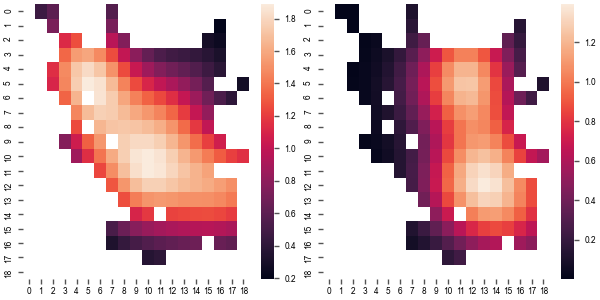

In [7]:
PF = pf.load_pf('Marble07', 'Shock', 1)
_, ax = plt.subplots(1, 2, figsize=(6, 3))
for a, id in zip(ax, neurons_plot):
    sns.heatmap(PF.tmap_sm[id], ax=a)

In [8]:
# Maybe better learner cell?
axlrncella, axlrncella_stats = Fig3comb.subplot2grid(Fig3.gs[1, 0:2], grid=(1, 4), return_axes=True)
mmd = fa.MotionTuningMultiDay('Marble07', arena = 'Shock', days= [-1, 4, 1, 2])
mmd.plot_raster_across_days(334, base_day=1, base_arena='Shock', batch_map=False, 
                            plot_ROI=False, ax=axlrncella.squeeze(), label_fig=False)

Assembling neuron map for base_day=1 and base_arena=Shock
Cannot find normal map - trying to run in reverse
Cannot find normal map - trying to run in reverse


/Users/nkinsky/miniconda3/envs/eraser/lib/python3.9/site-packages/seaborn/matrix.py:332: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  ax.figure.draw(ax.figure.canvas.get_renderer())
/Users/nkinsky/miniconda3/envs/eraser/lib/python3.9/site-packages/seaborn/matrix.py:332: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  ax.figure.draw(ax.figure.canvas.get_renderer())
/Users/nkinsky/miniconda3/envs/eraser/lib/python3.9/site-packages/seaborn/matrix.py:332: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  ax.figure.draw(ax.figure.canvas.get_renderer())
/Users/nkinsky/miniconda3/envs/eraser/lib/python3.9/site-packages/seaborn/matrix.py:332: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  

array([<AxesSubplot:title={'center':'Shock Day -1\n Cell 508'}, xlabel='Time from freeze_onset(s)', ylabel='freeze_onset #'>,
       <AxesSubplot:title={'center':'Shock Day 4\n Cell 341'}, xlabel='Time from freeze_onset(s)'>,
       <AxesSubplot:title={'center':'Shock Day 1\n Cell 334'}, xlabel='Time from freeze_onset(s)'>,
       <AxesSubplot:title={'center':'Shock Day 2\n Cell 16'}, xlabel='Time from freeze_onset(s)'>],
      dtype=object)

In [9]:
# Example learner cell
axlrncellb, axlrncellb_stats = Fig3comb.subplot2grid(Fig3.gs[2, 0:2], grid=(1, 4), return_axes=True)
mmd = fa.MotionTuningMultiDay('Marble24', arena = 'Shock', days= [-1, 4, 1, 2])
mmd.plot_raster_across_days(36, base_day=1, base_arena='Shock', batch_map=False,
                           plot_ROI=False, ax=axlrncellb.squeeze(), label_fig=False) # batch_map=True?

Assembling neuron map for base_day=1 and base_arena=Shock
Cannot find normal map - trying to run in reverse
Cannot find normal map - trying to run in reverse


/Users/nkinsky/miniconda3/envs/eraser/lib/python3.9/site-packages/seaborn/matrix.py:332: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  ax.figure.draw(ax.figure.canvas.get_renderer())
/Users/nkinsky/miniconda3/envs/eraser/lib/python3.9/site-packages/seaborn/matrix.py:332: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  ax.figure.draw(ax.figure.canvas.get_renderer())
/Users/nkinsky/miniconda3/envs/eraser/lib/python3.9/site-packages/seaborn/matrix.py:332: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  ax.figure.draw(ax.figure.canvas.get_renderer())


array([<AxesSubplot:>,
       <AxesSubplot:title={'center':'Shock Day 4\n Cell 60'}, xlabel='Time from freeze_onset(s)', ylabel='freeze_onset #'>,
       <AxesSubplot:title={'center':'Shock Day 1\n Cell 36'}, xlabel='Time from freeze_onset(s)'>,
       <AxesSubplot:title={'center':'Shock Day 2\n Cell 259'}, xlabel='Time from freeze_onset(s)'>],
      dtype=object)

In [10]:
# Example unstable ANI cell
# Need to update this to look out +/- 2 sec due to different frame rate
axanicell, axanicell_stats = Fig3comb.subplot2grid(Fig3.gs[3, 0:2], grid=(1, 4), return_axes=True)
mmd = fa.MotionTuningMultiDay('Marble20', arena = 'Shock', days= [-1, 4, 1, 2])
mmd.plot_raster_across_days(2, base_day=4, base_arena='Shock', batch_map=False,
                           plot_ROI=False, ax=axanicell.squeeze(), label_fig=False)

Assembling neuron map for base_day=4 and base_arena=Shock
Cannot find normal map - trying to run in reverse


/Users/nkinsky/miniconda3/envs/eraser/lib/python3.9/site-packages/seaborn/matrix.py:332: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  ax.figure.draw(ax.figure.canvas.get_renderer())
/Users/nkinsky/miniconda3/envs/eraser/lib/python3.9/site-packages/seaborn/matrix.py:332: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  ax.figure.draw(ax.figure.canvas.get_renderer())
/Users/nkinsky/miniconda3/envs/eraser/lib/python3.9/site-packages/seaborn/matrix.py:332: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  ax.figure.draw(ax.figure.canvas.get_renderer())
/Users/nkinsky/miniconda3/envs/eraser/lib/python3.9/site-packages/seaborn/matrix.py:332: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  

array([<AxesSubplot:title={'center':'Shock Day -1\n Cell 125'}, xlabel='Time from freeze_onset(s)', ylabel='freeze_onset #'>,
       <AxesSubplot:title={'center':'Shock Day 4\n Cell 2'}, xlabel='Time from freeze_onset(s)'>,
       <AxesSubplot:title={'center':'Shock Day 1\n Cell 18'}, xlabel='Time from freeze_onset(s)'>,
       <AxesSubplot:title={'center':'Shock Day 2\n Cell 217'}, xlabel='Time from freeze_onset(s)'>],
      dtype=object)

Supplemental cell plots

In [11]:
# Example freezing cells from Marble07: 53, 67, 90, and 334

In [12]:
# Marble 27 Shock day 4 cell 22

Plot #1s: plot freeze-tuned cell rasters with motion-tuned cell rasters right below - are these specific freezing cells or more motion tuned cells?

Plot #2b: Proportion freeze-tuned across days

Plot #2bsup: Proportion freeze off-tuned across days

Plot #2c: Freeze-tuned cell firing stability across days is higher in learners than non-learners from 4 to 1-hour session

In [18]:
ax_frz_stab1, ax_frz_stab1_stats = Fig3comb.subplot(444)
ts = fa.TuningStability('Shock', 'freeze_onset', 0.01) # Load in tuningstability object

base_day = 1
metric_plot = 'event_rates'
delta=True
fig, ax = ts.plot_metric_stability_by_group(base_day=base_day, metric_plot=metric_plot, delta=delta, 
                                           ax=[ax_frz_stab1, ax_frz_stab1_stats], size=2, alpha=0.7, jitter=0.15)

/Users/nkinsky/miniconda3/envs/eraser/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/nkinsky/miniconda3/envs/eraser/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [19]:
ax_frz_stab4, ax_frz_stab4_stats = Fig3comb.subplot(448)
ts = fa.TuningStability('Shock', 'freeze_onset', 0.01) # Load in tuningstability object

base_day = 4
metric_plot = 'event_rates'
delta=True
fig, ax = ts.plot_metric_stability_by_group(base_day=base_day, metric_plot=metric_plot, delta=delta,
                                           ax=[ax_frz_stab4, ax_frz_stab4_stats], size=2, alpha=0.7, jitter=0.15)

/Users/nkinsky/miniconda3/envs/eraser/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/nkinsky/miniconda3/envs/eraser/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Plot #3: Covariance matrix plot?

Plot #3a (Supplemental): Ensemble plots - show example of a couple ensembles that form and how they match freeze-cells.

Plot #4: Plot of %shock cells between groups across different epochs.

Plot #5: Plot of ANI effects on shock cell covariance

Plot #6: ANI effects on all cell covariance (none)

Plot #7: ANI effects on place-cell covariance? Look at only top cells maybe? Or look at just cells with high covariance on days -2/-1? Might expect it to stay high for ANI and get much reduced for others.  This is above and beyond the correlation metric because it looks at how cells fire together across the whole session, not just whether they happen to fire in the same spot.

/Users/nkinsky/miniconda3/envs/eraser/lib/python3.9/site-packages/IPython/core/pylabtools.py:134: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


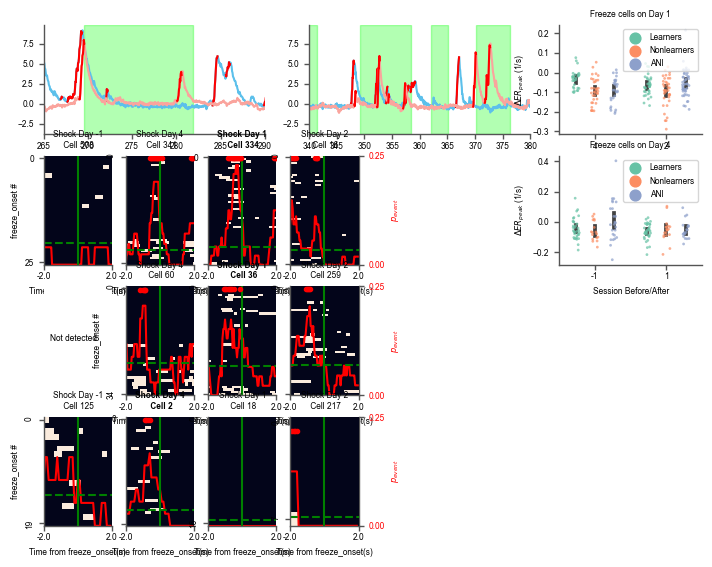

In [15]:
Fig3.fig

In [20]:
plot_path = Path('/Users/nkinsky/Documents/BU/Working/Eraser/plots')
Fig3.savefig(plot_path / 'Figure3.pdf', scriptname='Figure3.ipynb')
Fig3stats.savefig(plot_path / 'Figure3stats.pdf', scriptname='Figure3.ipynb')